In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, Conv1D, MaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding, GRU
import tensorflow as tf

In [3]:
df = pd.read_csv('./datasets/data_200.csv') 

In [4]:
df.head(3)

,text_parsed,money_laundering,text_parsed_length
0,running mayor 2016 thennorfolk sheriff bob mcc...,1,2796
1,ed probing former legislator money laundering ...,1,2513
2,enforcement directorate issued lookout notice ...,1,1891


In [5]:
x_train, x_test, y_train, y_test = train_test_split(df['text_parsed'], 
                                                    df['money_laundering'],
                                                    test_size=0.25,
                                                   )

In [6]:
vocab_size = 3000
embedded_dim = 8
max_len = 120
trunc_type = 'post'
oov_tok = "<OOV>"

In [7]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)


In [8]:
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(x_train)

In [9]:
len(word_index)


7519

In [10]:
padded = pad_sequences(sequences,maxlen=max_len, truncating=trunc_type)

In [11]:
padded.shape

(134, 120)

In [12]:
testing_sequences = tokenizer.texts_to_sequences(x_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_len)

In [13]:
testing_padded.shape

(66, 120)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedded_dim,input_length=max_len),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [15]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'], optimizer='adam')


In [16]:
hist = model.fit(padded,y_train,batch_size=64, epochs=10, validation_data=(testing_padded,y_test))

Train on 134 samples, validate on 66 samples
Epoch 1/10
134/134 [==============================] - 0s 971us/sample - loss: 1.4026 - acc: 0.0000e+00 - val_loss: 1.3883 - val_acc: 0.0000e+00
Epoch 2/10
134/134 [==============================] - 0s 90us/sample - loss: 1.3844 - acc: 0.0000e+00 - val_loss: 1.3718 - val_acc: 0.0000e+00
Epoch 3/10
134/134 [==============================] - 0s 75us/sample - loss: 1.3662 - acc: 0.0299 - val_loss: 1.3555 - val_acc: 0.7121
Epoch 4/10
134/134 [==============================] - 0s 45us/sample - loss: 1.3484 - acc: 0.7687 - val_loss: 1.3396 - val_acc: 0.7121
Epoch 5/10
134/134 [==============================] - 0s 60us/sample - loss: 1.3311 - acc: 0.7687 - val_loss: 1.3244 - val_acc: 0.7121
Epoch 6/10
134/134 [==============================] - 0s 75us/sample - loss: 1.3151 - acc: 0.7687 - val_loss: 1.3097 - val_acc: 0.7121
Epoch 7/10
134/134 [==============================] - 0s 54us/sample - loss: 1.2992 - acc: 0.7687 - val_loss: 1.2949 - val_acc: 

In [17]:
print(hist.history)

{'loss': [1.402553024576671, 1.3843509634928917, 1.3661576313758963, 1.3484452215593252, 1.3310964267645309, 1.3151183840054184, 1.2991831889793055, 1.2829853830052846, 1.2663976274319548, 1.2495149302838453], 'acc': [0.0, 0.0, 0.029850746, 0.76865673, 0.76865673, 0.76865673, 0.76865673, 0.76865673, 0.76865673, 0.76865673], 'val_loss': [1.38826102921457, 1.3718063722957263, 1.3555261799783418, 1.3395946459336714, 1.324439200488004, 1.3097055680824048, 1.2949471834934119, 1.279953815720298, 1.2646084120779326, 1.248786854021477], 'val_acc': [0.0, 0.0, 0.7121212, 0.7121212, 0.7121212, 0.7121212, 0.7121212, 0.7121212, 0.7121212, 0.7121212]}


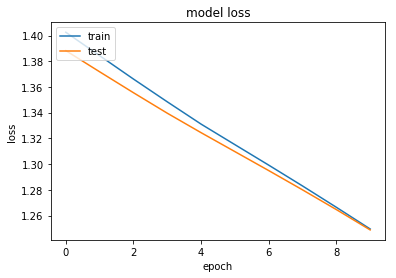

In [18]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

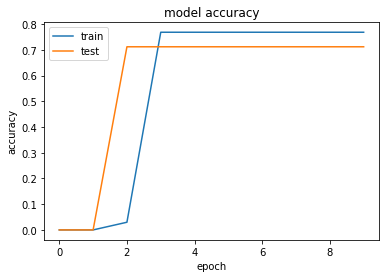

In [19]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedded_dim,input_length=max_len),
    tf.keras.layers.LSTM(15, return_sequences=True),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [21]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'], optimizer='adam')

In [22]:
hist = model.fit(padded,y_train,batch_size=64, epochs=10, validation_data=(testing_padded,y_test))

Train on 134 samples, validate on 66 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
134/134 [==============================] - 1s 7ms/sample - loss: 1.3990 - acc: 0.0000e+00 - val_loss: 1.3868 - val_acc: 0.1667
Epoch 2/10
134/134 [==============================] - 0s 2ms/sample - loss: 1.3826 - acc: 0.4328 - val_loss: 1.3736 - val_acc: 0.7121
Epoch 3/10
134/134 [==============================] - 0s 2ms/sample - loss: 1.3695 - acc: 0.7687 - val_loss: 1.3637 - val_acc: 0.7121
Epoch 4/10
134/134 [==============================] - 0s 3ms/sample - loss: 1.3594 - acc: 0.7687 - val_loss: 1.3541 - val_acc: 0.7121
Epoch 5/10
134/134 [==============================] - 0s 3ms/sample - loss: 1.3490 - acc: 0.7687 - val_loss: 1.3442 - val_acc: 0.7121
Epoch 6/10
134/134 [==============================] - 0s 3ms/sample - loss: 1.3382 - acc: 0.7687 - val_loss: 1.3337 - val_acc: 0.7121
Epoch 7/10
134/134 [==============================] -

In [23]:
print(hist.history)

{'loss': [1.3989883750232297, 1.3825579330102722, 1.3694605311351036, 1.359364111032059, 1.349030629912419, 1.338246646212108, 1.3266006512428397, 1.3142068012436825, 1.300883914107707, 1.2859640922119369], 'acc': [0.0, 0.43283582, 0.76865673, 0.76865673, 0.76865673, 0.76865673, 0.76865673, 0.76865673, 0.76865673, 0.76865673], 'val_loss': [1.3867538553295713, 1.3736406673084607, 1.363709240248709, 1.354130101926399, 1.344209894989476, 1.333726420547023, 1.3226097894437385, 1.310539231155858, 1.2970248460769653, 1.281715609810569], 'val_acc': [0.16666667, 0.7121212, 0.7121212, 0.7121212, 0.7121212, 0.7121212, 0.7121212, 0.7121212, 0.7121212, 0.7121212]}


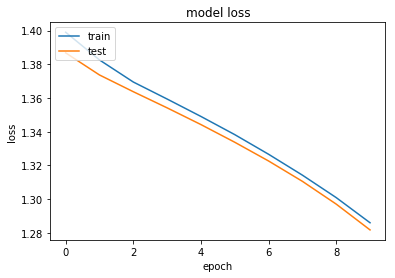

In [24]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

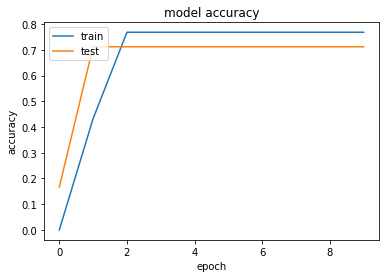

In [25]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedded_dim,input_length=max_len),
    tf.keras.layers.Bidirectional(LSTM(15, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [27]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'], optimizer='adam')

In [28]:
hist = model.fit(padded,y_train,batch_size=64, epochs=10, validation_data=(testing_padded,y_test))

Train on 134 samples, validate on 66 samples
Epoch 1/10
134/134 [==============================] - 2s 14ms/sample - loss: 1.3846 - acc: 0.3209 - val_loss: 1.3706 - val_acc: 0.7121
Epoch 2/10
134/134 [==============================] - 1s 5ms/sample - loss: 1.3636 - acc: 0.7687 - val_loss: 1.3533 - val_acc: 0.7121
Epoch 3/10
134/134 [==============================] - 1s 6ms/sample - loss: 1.3440 - acc: 0.7687 - val_loss: 1.3359 - val_acc: 0.7121
Epoch 4/10
134/134 [==============================] - 1s 5ms/sample - loss: 1.3237 - acc: 0.7687 - val_loss: 1.3171 - val_acc: 0.7121
Epoch 5/10
134/134 [==============================] - 1s 5ms/sample - loss: 1.3018 - acc: 0.7687 - val_loss: 1.2962 - val_acc: 0.7121
Epoch 6/10
134/134 [==============================] - 1s 5ms/sample - loss: 1.2765 - acc: 0.7687 - val_loss: 1.2728 - val_acc: 0.7121
Epoch 7/10
134/134 [==============================] - 1s 5ms/sample - loss: 1.2490 - acc: 0.7687 - val_loss: 1.2460 - val_acc: 0.7121
Epoch 8/10
134/1

In [29]:
print(hist.history)

{'loss': [1.3846123449837984, 1.363630869495335, 1.3439644076930943, 1.323689857525612, 1.3017747135304694, 1.2765059346583352, 1.2490220745997642, 1.2168653046906883, 1.1787432788023309, 1.1352808706795992], 'acc': [0.32089552, 0.76865673, 0.76865673, 0.76865673, 0.76865673, 0.76865673, 0.76865673, 0.76865673, 0.76865673, 0.76865673], 'val_loss': [1.3706148465474446, 1.3532664017243818, 1.3359175595370205, 1.3170871590123032, 1.2962139953266492, 1.2727803894967744, 1.2460320320996372, 1.2145541725736675, 1.176694342584321, 1.1306430354262844], 'val_acc': [0.7121212, 0.7121212, 0.7121212, 0.7121212, 0.7121212, 0.7121212, 0.7121212, 0.7121212, 0.7121212, 0.7121212]}


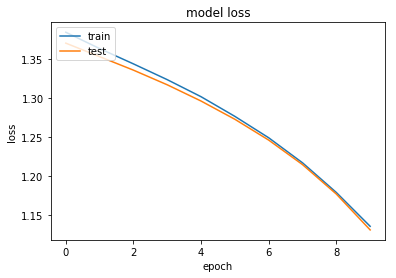

In [30]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

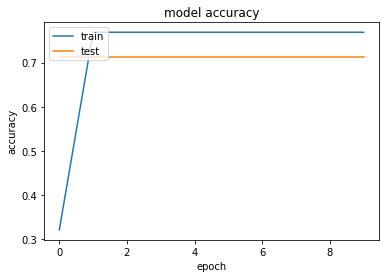

In [31]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedded_dim,input_length=max_len),
    tf.keras.layers.GRU(15, return_sequences=True),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [33]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'], optimizer='adam')

In [34]:
hist = model.fit(padded,y_train,batch_size=64, epochs=10, validation_data=(testing_padded,y_test))

Train on 134 samples, validate on 66 samples
Epoch 1/10
134/134 [==============================] - 1s 8ms/sample - loss: 1.3900 - acc: 0.0224 - val_loss: 1.3792 - val_acc: 0.7121
Epoch 2/10
134/134 [==============================] - 0s 3ms/sample - loss: 1.3739 - acc: 0.7687 - val_loss: 1.3678 - val_acc: 0.7121
Epoch 3/10
134/134 [==============================] - 0s 3ms/sample - loss: 1.3604 - acc: 0.7687 - val_loss: 1.3566 - val_acc: 0.7121
Epoch 4/10
134/134 [==============================] - 0s 3ms/sample - loss: 1.3473 - acc: 0.7687 - val_loss: 1.3452 - val_acc: 0.7121
Epoch 5/10
134/134 [==============================] - 0s 3ms/sample - loss: 1.3340 - acc: 0.7687 - val_loss: 1.3330 - val_acc: 0.7121
Epoch 6/10
134/134 [==============================] - 0s 3ms/sample - loss: 1.3195 - acc: 0.7687 - val_loss: 1.3202 - val_acc: 0.7121
Epoch 7/10
134/134 [==============================] - 0s 3ms/sample - loss: 1.3048 - acc: 0.7687 - val_loss: 1.3063 - val_acc: 0.7121
Epoch 8/10
134/13

In [35]:
print(hist.history)

{'loss': [1.3900253078830775, 1.3739447540311671, 1.360443102779673, 1.3472749386260758, 1.3339874922339596, 1.3194885004812211, 1.3047562926562863, 1.2882151817207905, 1.2696538843325715, 1.2501116439477722], 'acc': [0.02238806, 0.76865673, 0.76865673, 0.76865673, 0.76865673, 0.76865673, 0.76865673, 0.76865673, 0.76865673, 0.76865673], 'val_loss': [1.3791500546715476, 1.3678100687084775, 1.3566107171954531, 1.3452266418572627, 1.3329881538044324, 1.3202207232966567, 1.3062566554907598, 1.290594144300981, 1.2736420450788555, 1.255955696105957], 'val_acc': [0.7121212, 0.7121212, 0.7121212, 0.7121212, 0.7121212, 0.7121212, 0.7121212, 0.7121212, 0.7121212, 0.7121212]}


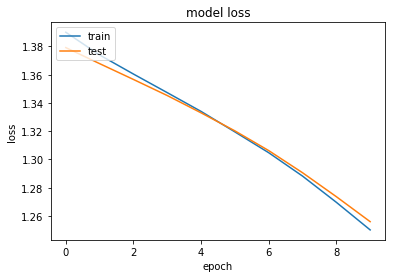

In [36]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

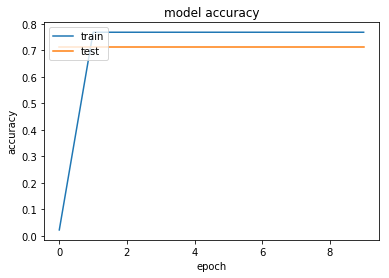

In [37]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedded_dim,input_length=max_len),
    tf.keras.layers.Bidirectional(GRU(15, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'], optimizer='adam')

In [ ]:
hist = model.fit(padded,y_train,batch_size=64, epochs=10, validation_data=(testing_padded,y_test))

In [ ]:
print(hist.history)

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedded_dim,input_length=max_len),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'], optimizer='adam')

In [ ]:
hist = model.fit(padded,y_train,batch_size=64, epochs=10, validation_data=(testing_padded,y_test))

In [ ]:
print(hist.history)

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()